## Implementing the Model

**6 Steps to build a Linear Regression model:**

- Step 0: Importing necessary libraries
- Step 1: Importing the dataset
- Step 2: Data pre-processing
- Step 3: Splitting the test and train sets
- Step 4: Fitting the linear regression model to the training set
- Step 5: Predicting test results
- Step 6: Visualizing the test results

## 0. Importing libraries

In [1]:
import numpy as np
import pandas as pd             # data analysis library
import matplotlib.pyplot as plt # data visualization
import seaborn as sns           # data visualization
from sklearn.model_selection import train_test_split # machine learning
from sklearn.linear_model import LinearRegression

## 1. Importing the dataset

We'll begin with importing the dataset using **pandas** and also import other libraries such as **numpy** and **matplotlib**.

In [2]:
data = pd.read_csv("student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## 2. Data Preprocessing

### Visualisation

The graphical representation of the data,

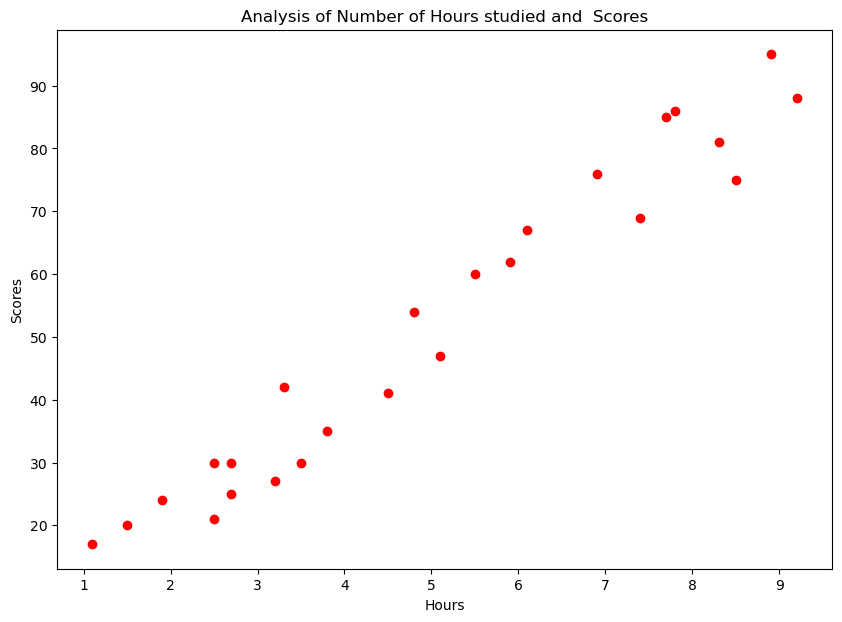

In [3]:
plt.figure(figsize=(10,7))
plt.scatter(data.Hours,data.Scores,color="red")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Analysis of Number of Hours studied and  Scores")
plt.show()

We can easily see that there is a relationship between these two variables. Technically, this suggests that the variables are correlated. The correlation coefficient 'R' determines how strong the correlation is.

R can range from **+1 to -1**, but the further this figure is away from 0, the stronger is the correlation. **'1'** indicates a strong positive relationship and **'-1'** indicates a strong negative relationship. **'0'**, on the other hand, indicates no relationship at all.

#### A graphical view of a correlation of -1, 0 and +1 is shown in Figure.

![image.png](attachment:image.png)

**There are several types of correlation coefficients but the most popular is Pearson's Correlation. Its coefficient formula is seen in Figure:**

![image-4.png](attachment:image-4.png)

### How correlated are they? 

The corr() method calculates and displays the correlations between numerical variables in a DataFrame:

In [4]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


The R value is 0.976, which is close to 1. Hence, the two variables are strongly positively correlated.

**Note**: In simple terms, the shape of the data is important to know for selecting the model for prediction. So always draw the plot to get a sense of the data.

**Pandas also ships with a great helper method for statistical summaries, and we can describe() the dataset to get an idea of the mean, maximum, minimum, etc. values of our columns:**

In [6]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.01,2.53,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.48,25.29,17.0,30.0,47.0,75.0,95.0


**Now, we can divide our data in two arrays - one for the dependent feature and one for the independent, or target feature. Since we want to predict the score percentage depending on the hours studied, our y will be the "Score" column and our X will the "Hours" column.**

To separate the target and features, we can attribute the dataframe column values to our y and X variables:

In [8]:
X = data[['Hours']]  # feature vector
y = data['Scores']   # target column

>**Note: df['Column_Name'] returns a pandas Series. Some libraries can work on a Series just as they would on a NumPy array, but not all libraries have this awareness. In some cases, you'll want to extract the underlying NumPy array that describes your data. This is easily done via the values field of the Series.**

In [9]:
print(X)
print(y)

    Hours
0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


Scikit-Learn's linear regression model expects a 2D input, and we're really offering a 1D array if we just extract the values:

In [10]:
print(X.shape)

(25, 1)


In [11]:
print(y.shape)

(25,)


In [16]:
# Splitting dataet into training and testing sets

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [17]:
print("Length of X",len(X))
print("Length of X_train",len(X_train))
print("Length of X_test",len(X_test))

Length of X 25
Length of X_train 20
Length of X_test 5


## Training a Linear Regression Model

In [18]:
regressor = LinearRegression()

regressor.fit(X_train,y_train)

LinearRegression()

In [19]:
# Printing value of our slope

regressor.coef_

array([9.96529864])

In [20]:
# Prining value of y-intercept

regressor.intercept_

0.6330496481399024

In [21]:
# Regression equation

# Y = mX+C

score = 9.96529864*6+0.6330496481399024
score

60.424841488139904

In [23]:
# Find score of a student who wants to study for 10 hours

score = regressor.predict([[10]])
score

C:\Users\Administrator.LAB-STUDENT\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([100.2860361])

In [24]:
score = regressor.predict([[int(input("Enter numbers of hours you want to study>>> "))]])
score

Enter numbers of hours you want to study>>> 8


C:\Users\Administrator.LAB-STUDENT\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([80.35543881])